# Lab 07 - Error based learning
# Lab 07 - 基于误差的学习

线性回归：利用大量的样本，通过有监督的学习，学习到由x到y的映射，利用该映射关系对未知的数据进行预估，因为y为连续值，所以是回归问题。

逻辑回归：线性回归可以预测连续值，但是不能解决分类问题，我们需要根据预测的结果判定其属于正类还是负类。所以逻辑回归就是将线性回归的 ( − ∞ , + ∞ ) (-\infty,+\infty) (−∞,+∞)结果，通过sigmoid函数映射到 ( 0 , 1 ) (0,1) (0,1)之间。

This week we are going to focus on linear regression and logistic regression.

本周我们将集中讨论线性回归和逻辑回归。

#### Importing libraries
#### 导入库

In [1]:
import sys
sys.path
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

## 线性回归

在开始之前，让我们从sklearn导入波士顿房价数据集。这个数据集是20世纪70年代著名的数据集，有13个特征，描述了每个城镇的犯罪率、住宅用地面积、氧化亚氮污染量、每户住房的房间数、离就业中心的距离、每个城镇的师生比、低收入人群的统计等特征，等等。

In [3]:
data = datasets.load_boston()
data_df = pd.DataFrame(data.data, columns=data.feature_names)
target_df = pd.DataFrame(data.target, columns=['Target'])

data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
target_df.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2



波士顿数据集有13个描述性特征。它们都是数值特征。所以我们可以用它们给我们的算法。让我们将这个数据集分为训练集和测试集。

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_df, target_df)

正如你前面看到的，这次的目标特性是连续的。所以我们必须使用回归函数，而不是分类器作为我们的模型。让我们启动一个线性回归模型。

You can find linear regression models at sklearn.linear_model package. Let's import LinearRegression model from there. You can find the documentation
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

你可以在sklearn.linear_model 包模块里找到线性回归模型。让我们从那里导入LinearRegression模型。你可以在【here】找到文档。

In [6]:
lin_reg = LinearRegression(normalize=True)

是时候训练数据了。因为每个特征都是数值的，所以我们可以直接在这个模型中使用它们。
让我们训练我们的模型并评估性能。

In [7]:
lin_reg.fit(X=X_train, y=y_train)

LinearRegression(normalize=True)

In [8]:
pred = lin_reg.predict(X=X_test)

我们不能在这里使用准确度、召回率或f1分数等性能指标。因为这些指标是为分类任务定义的。可以用来评估回归任务性能的指标很少。一个最简单的度量是均方误差。

In [9]:
print("Mean squared error:", mean_squared_error(y_pred=pred, y_true=y_test))

Mean squared error: 15.984962308578226


您可以在我们的模型中看到经过训练的系数，并了解哪些特征比其他特征更适合预测。

In [10]:
corr_df = pd.DataFrame(data.feature_names, columns=['Features'])
corr_df['weight'] = lin_reg.coef_[0]
print(corr_df)

   Features     weight
0      CRIM  -0.133185
1        ZN   0.036498
2     INDUS   0.026642
3      CHAS   3.483029
4       NOX -18.563720
5        RM   3.229193
6       AGE   0.015680
7       DIS  -1.381603
8       RAD   0.356182
9       TAX  -0.011693
10  PTRATIO  -1.082138
11        B   0.008689
12    LSTAT  -0.623621


## 逻辑回归

接下来我们将尝试使用基于错误的学习来执行分类任务。让我们先为分类任务导入一个数据集。

In [11]:
heart_df = pd.read_csv('Heart.csv')

heart_df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


让我们填充空值并进行一些清理。

In [13]:
heart_df['Ca'].fillna(heart_df['Ca'].mode(dropna=True)[0], inplace=True)
heart_df['Thal'].fillna(heart_df['Thal'].mode(dropna=True)[0], inplace=True)
print(heart_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        303 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


你可以看到我们在数据集中有一些分类的非序数数据。我们必须将它们编码为数字，以便在线性模型中使用。

你可以使用pandas中的get_dummies函数从分类特征中获取一个热编码特征。

In [14]:
X = heart_df.drop(['AHD', 'Unnamed: 0'], axis=1)
y = heart_df['AHD']

X.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


In [15]:
df_encoded = pd.get_dummies(X)
df_encoded.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


For classification we are using Logistic Regression algorithm. You can find the documentation of Logistic Regression
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

对于分类，我们使用Logistic回归算法。你可以找到Logistic回归的文档

In [16]:
log_reg = LogisticRegression(max_iter=10000)

让我们将编码的数据集划分并拟合到logistic回归模型中，并测量性能。

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y)

In [18]:
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

          No       0.76      0.76      0.76        41
         Yes       0.71      0.71      0.71        35

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



### Task
* Using the heart.csv given, train a model to predict the 'Chol' level of a patient using linear regression. Take
'AHD' values as a descriptive feature.
    1. Read the documentation and identify the hyperparameters of the Linear regression algorithm. Do some
  hyperparameter tuning and identify the set of parameters that's best for your model.
  
* Using the dataset you cleaned in lab 02 and 03,
  1. First,
    * Train a logistic regression model and measure the performance.
    * Then encode all the non-ordinal categorical variables using one-hot encoding and train another logistic
    regression model.
    Compare the results in both scenarios.
  2. Read the documentation and identify the hyperparameters of the Logistic regression algorithm. Do some
  hyperparameter tuning and identify the set of parameters that's best for your model.

### 任务
* 使用给定的heart.csv，训练一个模型，用线性回归预测患者的“Chol”水平。接受“AHD”值作为描述性特征。
    1. 阅读文档并搞清楚线性回归算法的超参数。做一些超参数调整并确定最适合您的模型的参数集。
* 使用你在实验室02和03清理的数据集，
    1. 第一，
        * 训练一个logistic回归模型并衡量绩效。
        * 然后使用一个热编码对所有非有序分类变量进行编码，并训练另一个logistic变量
        回归模型。
        比较两种情况下的结果。
    2. 阅读文档并识别Logistic回归算法的超参数。做一些超参数调整并确定最适合您的模型的参数集。

## 任务1：线性回归

In [19]:
# 读取数据
heart_df = pd.read_csv('heart.csv')
heart_df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [20]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [21]:

# 替换目标值
num_encode = {
    'AHD': {'No':0, "Yes":1},
}
heart_df.replace(num_encode,inplace=True)
heart_target_df = heart_df['Chol']
# 删除非可选object列、目标值列
heart_df.drop(['Unnamed: 0','Chol'],axis=1,inplace=True)
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Fbs        303 non-null    int64  
 5   RestECG    303 non-null    int64  
 6   MaxHR      303 non-null    int64  
 7   ExAng      303 non-null    int64  
 8   Oldpeak    303 non-null    float64
 9   Slope      303 non-null    int64  
 10  Ca         299 non-null    float64
 11  Thal       301 non-null    object 
 12  AHD        303 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 30.9+ KB


In [22]:
heart_df_encoded = pd.get_dummies(heart_df)
heart_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   RestBP                  303 non-null    int64  
 3   Fbs                     303 non-null    int64  
 4   RestECG                 303 non-null    int64  
 5   MaxHR                   303 non-null    int64  
 6   ExAng                   303 non-null    int64  
 7   Oldpeak                 303 non-null    float64
 8   Slope                   303 non-null    int64  
 9   Ca                      299 non-null    float64
 10  AHD                     303 non-null    int64  
 11  ChestPain_asymptomatic  303 non-null    uint8  
 12  ChestPain_nonanginal    303 non-null    uint8  
 13  ChestPain_nontypical    303 non-null    uint8  
 14  ChestPain_typical       303 non-null    ui

In [23]:
# 连续值列的空值用平均值填充
dfcolumns = heart_df_encoded.columns.values.tolist()
for item in dfcolumns:
    if heart_df_encoded[item].dtype == 'float':
       heart_df_encoded[item].fillna(heart_df_encoded[item].median(), inplace=True)
heart_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   RestBP                  303 non-null    int64  
 3   Fbs                     303 non-null    int64  
 4   RestECG                 303 non-null    int64  
 5   MaxHR                   303 non-null    int64  
 6   ExAng                   303 non-null    int64  
 7   Oldpeak                 303 non-null    float64
 8   Slope                   303 non-null    int64  
 9   Ca                      303 non-null    float64
 10  AHD                     303 non-null    int64  
 11  ChestPain_asymptomatic  303 non-null    uint8  
 12  ChestPain_nonanginal    303 non-null    uint8  
 13  ChestPain_nontypical    303 non-null    uint8  
 14  ChestPain_typical       303 non-null    ui

In [24]:
test_size_list = []
mean_squared_error_list = []
test_size_num = 0.05
while test_size_num <= 0.9:
    # 切割训练、预测数据
    X_train, X_test, y_train, y_test = train_test_split(heart_df_encoded, heart_target_df,test_size=test_size_num)
    # 生成线性回归对象
    lin_reg = LinearRegression(normalize=True)
    # 训练线性回归模型
    lin_reg.fit(X=X_train, y=y_train)
    # 使用线性回归模型进行预测
    pred = lin_reg.predict(X=X_test)
    # 输出预测结果的均方误差
    print("test_size_num：%s,\nMean squared error:" % test_size_num, mean_squared_error(y_pred=pred, y_true=y_test))
    test_size_list.append(test_size_num)
    mean_squared_error_list.append(mean_squared_error(y_pred=pred, y_true=y_test))
    test_size_num = test_size_num + 0.05

    

test_size_num：0.05,
Mean squared error: 1378.132130842479
test_size_num：0.1,
Mean squared error: 3127.4614895043405
test_size_num：0.15000000000000002,
Mean squared error: 2264.7040539288864
test_size_num：0.2,
Mean squared error: 3381.5055668241876
test_size_num：0.25,
Mean squared error: 2954.9721129106274
test_size_num：0.3,
Mean squared error: 2350.2277454294594
test_size_num：0.35,
Mean squared error: 1942.5560389670588
test_size_num：0.39999999999999997,
Mean squared error: 2268.6307783594225
test_size_num：0.44999999999999996,
Mean squared error: 2404.157147017501
test_size_num：0.49999999999999994,
Mean squared error: 3090.019502955967
test_size_num：0.5499999999999999,
Mean squared error: 2373.4330295575915
test_size_num：0.6,
Mean squared error: 2329.250885734077
test_size_num：0.65,
Mean squared error: 2911.4965290415957
test_size_num：0.7000000000000001,
Mean squared error: 2809.1325111213796
test_size_num：0.7500000000000001,
Mean squared error: 3301.529300941949
test_size_num：0.800000

Text(0, 0.5, 'mean_squared_error')

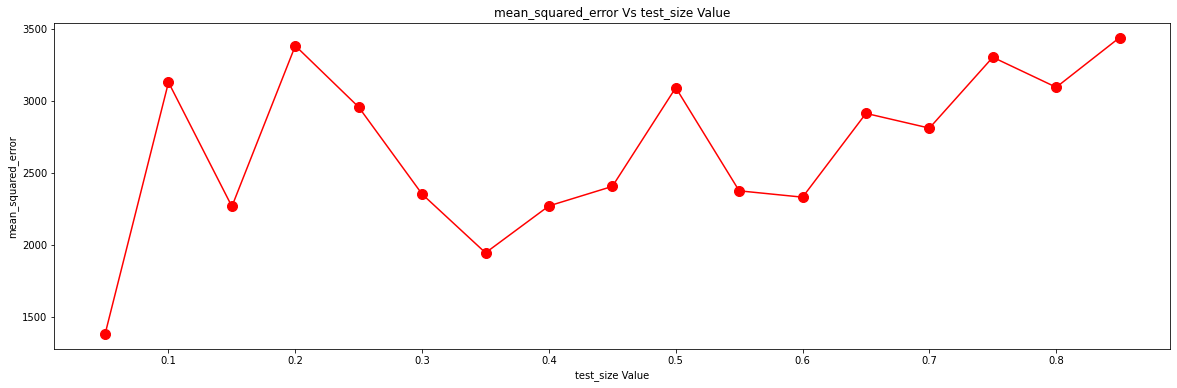

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(test_size_list, mean_squared_error_list, color='red', marker='o',
         markersize=10)

# my_y_ticks = np.arange(0, 0.5, 0.05)
# plt.yticks(my_y_ticks)
plt.title('mean_squared_error Vs test_size Value')
plt.xlabel('test_size Value')
plt.ylabel('mean_squared_error')

In [26]:
# print(metrics.accuracy_score(y_test, pred))

## 任务2：逻辑回归模型

In [27]:
bands_df = pd.read_csv('lab02_bands.csv')
bands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           540 non-null    int64  
 1   timestamp            540 non-null    int64  
 2   cylinder number      540 non-null    object 
 3   customer             540 non-null    object 
 4   job number           540 non-null    int64  
 5   grain screened       540 non-null    object 
 6   ink color            540 non-null    object 
 7   proof on ctd ink     540 non-null    object 
 8   blade mfg            540 non-null    object 
 9   cylinder division    540 non-null    object 
 10  paper type           540 non-null    object 
 11  ink type             540 non-null    object 
 12  direct steam         540 non-null    object 
 13  solvent type         540 non-null    object 
 14  type on cylinder     540 non-null    object 
 15  press type           540 non-null    obj

In [28]:
X = bands_df.drop(['band type', 'Unnamed: 0','timestamp'], axis=1)
y = bands_df['band type']
df_encoded = pd.get_dummies(X)

df_encoded.head()

,job number,press,unit number,plating tank,proof cut,viscosity,caliper,ink temperature,humifity,roughness,...,press type_motter94,press type_woodhoe70,cylinder size_catalog,cylinder size_spiegel,cylinder size_tabloid,paper mill location_canadian,paper mill location_mideuropean,paper mill location_northus,paper mill location_scandanavian,paper mill location_southus
0,25503,821,2,1911,55.0,46.0,0.200,17.0,78.0,0.7500,...,1,0,0,0,1,0,0,1,0,0
1,25503,821,2,1910,55.0,46.0,0.300,15.0,80.0,0.7500,...,1,0,0,0,1,0,0,1,0,0
2,47201,815,9,1910,62.0,40.0,0.433,16.0,80.0,0.7500,...,0,1,1,0,0,0,0,1,0,0
3,39039,816,9,1910,52.0,40.0,0.300,16.0,75.0,0.3125,...,0,1,1,0,0,0,0,1,0,0
4,37351,816,2,1910,50.0,46.0,0.300,17.0,80.0,0.7500,...,0,1,0,0,1,0,0,1,0,0


In [29]:
accuracy = []
max_iter_list = []
i = 0
while i<10000:
    i = i+1000
    log_reg = LogisticRegression(max_iter=i)
    X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.1)
    log_reg.fit(X_train, y_train)
    pred = log_reg.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred))
    max_iter_list.append(i)
#     print(classification_report(y_pred=pred, y_true=y_test))



/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Accuracy')

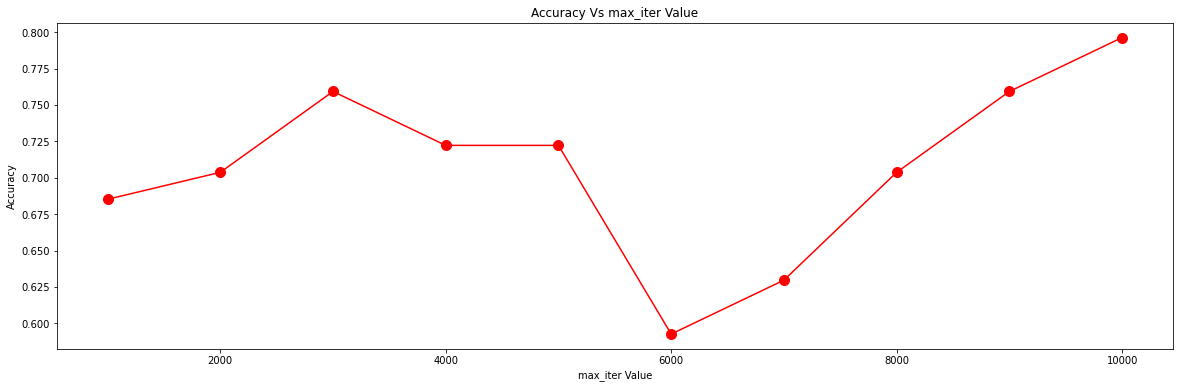

In [30]:
plt.figure(figsize=(20, 6))
plt.plot(max_iter_list, accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs max_iter Value')
plt.xlabel('max_iter Value')
plt.ylabel('Accuracy')